# Pandas and Finance

## Core Pandas Time Methods

In [1]:
import numpy as np
import pandas as pd

from datetime import datetime

In [2]:
myyear = 2015
mymonth = 1
myday = 1
myhour = 2
mymin = 30
mysec = 15

In [5]:
mydate = datetime(myyear, mymonth, myday)

In [6]:
mydate

datetime.datetime(2015, 1, 1, 0, 0)

In [7]:
mydatetime = datetime(myyear, mymonth, myday, myhour, mymin, mysec)

In [8]:
mydatetime

datetime.datetime(2015, 1, 1, 2, 30, 15)

In [9]:
mydatetime.year

2015

In [10]:
myser = pd.Series(['Nov 3, 1990','2000-01-01',None])

In [11]:
myser

0    Nov 3, 1990
1     2000-01-01
2           None
dtype: object

In [13]:
myser[0] # it just returns a string object of a date. But how do we get it as a dat object?

'Nov 3, 1990'

In [15]:
timeser = pd.to_datetime(myser) #powerful method, now we get date objects

In [16]:
timeser

0   1990-11-03
1   2000-01-01
2          NaT
dtype: datetime64[ns]

In [17]:
timeser[0].year

1990

In [18]:
obvi_euro_date = '31-12-2000'

In [19]:
pd.to_datetime(obvi_euro_date) #here it correctly formats the obvious european date
# since a month can't be 31

C:\Users\iliaa\AppData\Local\Temp\ipykernel_28404\163700324.py:1: UserWarning: Parsing '31-12-2000' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  pd.to_datetime(obvi_euro_date)


Timestamp('2000-12-31 00:00:00')

In [20]:
euro_date = '10-12-2000'

In [21]:
pd.to_datetime(euro_date)

Timestamp('2000-10-12 00:00:00')

In [23]:
pd.to_datetime(euro_date,dayfirst=True) # we need to specify that the day is first
# now, we will get the correct date

Timestamp('2000-12-10 00:00:00')

In [24]:
style_date = '12--Dec--2000' #weird formatting of a date

In [25]:
# how do tell the .to_datetime() object how the format is
pd.to_datetime(style_date,format='%d--%b--%Y') # the keyword for the format is found in the section notes

Timestamp('2000-12-12 00:00:00')

In [26]:
custom_date = '12th of Dec 2000'

In [27]:
pd.to_datetime(custom_date)

Timestamp('2000-12-12 00:00:00')

In [30]:
sales = pd.read_csv('RetailSales_BeerWineLiquor.csv')

In [31]:
sales

,DATE,MRTSSM4453USN
0,1992-01-01,1509
1,1992-02-01,1541
2,1992-03-01,1597
3,1992-04-01,1675
4,1992-05-01,1822
...,...,...
335,2019-12-01,6630
336,2020-01-01,4388
337,2020-02-01,4533
338,2020-03-01,5562


In [32]:
sales['DATE'] # the date column is treated as a string object

0      1992-01-01
1      1992-02-01
2      1992-03-01
3      1992-04-01
4      1992-05-01
          ...    
335    2019-12-01
336    2020-01-01
337    2020-02-01
338    2020-03-01
339    2020-04-01
Name: DATE, Length: 340, dtype: object

In [33]:
# this is how we convert the string DATE column to a dateimte object
sales['DATE'] = pd.to_datetime(sales['DATE'])

In [34]:
sales

,DATE,MRTSSM4453USN
0,1992-01-01,1509
1,1992-02-01,1541
2,1992-03-01,1597
3,1992-04-01,1675
4,1992-05-01,1822
...,...,...
335,2019-12-01,6630
336,2020-01-01,4388
337,2020-02-01,4533
338,2020-03-01,5562


In [35]:
sales['DATE']

0     1992-01-01
1     1992-02-01
2     1992-03-01
3     1992-04-01
4     1992-05-01
         ...    
335   2019-12-01
336   2020-01-01
337   2020-02-01
338   2020-03-01
339   2020-04-01
Name: DATE, Length: 340, dtype: datetime64[ns]

In [36]:
sales['DATE'][0].year

1992

In [39]:
# we can also parse dates right when we read a in a document
sales = pd.read_csv('RetailSales_BeerWineLiquor.csv',parse_dates=[0])
sales

,DATE,MRTSSM4453USN
0,1992-01-01,1509
1,1992-02-01,1541
2,1992-03-01,1597
3,1992-04-01,1675
4,1992-05-01,1822
...,...,...
335,2019-12-01,6630
336,2020-01-01,4388
337,2020-02-01,4533
338,2020-03-01,5562


In [40]:
sales = sales.set_index("DATE") # we set our date column as the index

In [42]:
sales.resample(rule='A').mean()
# A for the rule param means resample the date and group them by YEAR
# the different symbols for the Rules in the course section notes

,MRTSSM4453USN
DATE,
1992-12-31,1807.250000
1993-12-31,1794.833333
1994-12-31,1841.750000
1995-12-31,1833.916667
1996-12-31,1929.750000
1997-12-31,2006.750000
1998-12-31,2115.166667
1999-12-31,2206.333333
2000-12-31,2375.583333


In [44]:
sales = pd.read_csv('RetailSales_BeerWineLiquor.csv',parse_dates=[0])

In [45]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   DATE           340 non-null    datetime64[ns]
 1   MRTSSM4453USN  340 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 5.4 KB


In [48]:
# We can use the Datetime attributes from pandas by calling
# .dt method on Datetime objects
sales['DATE'].dt.year

0      1992
1      1992
2      1992
3      1992
4      1992
       ... 
335    2019
336    2020
337    2020
338    2020
339    2020
Name: DATE, Length: 340, dtype: int64

## Pandas Visualizations

In [54]:
df = pd.read_csv('DATA\FB.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-09-06,126.669998,129.940002,126.470001,129.729996,129.729996,26278400
1,2016-09-07,130.039993,131.979996,129.949997,131.050003,131.050003,27990800
2,2016-09-08,130.919998,131.080002,129.809998,130.270004,130.270004,15676600
3,2016-09-09,129.710007,129.949997,127.099998,127.099998,127.099998,27100700
4,2016-09-12,125.959999,128.759995,125.750000,128.690002,128.690002,21252800
...,...,...,...,...,...,...,...
1253,2021-08-27,365.100006,373.739990,364.079987,372.630005,372.630005,11214200
1254,2021-08-30,372.559998,381.489990,370.519989,380.660004,380.660004,13547300
1255,2021-08-31,379.950012,382.760010,378.799988,379.380005,379.380005,12345400
1256,2021-09-01,379.589996,384.329987,378.809998,382.049988,382.049988,11567200


<AxesSubplot:>

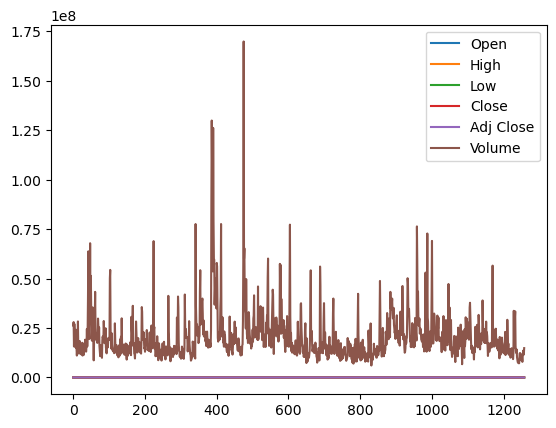

In [56]:
df.plot() # this doesnt make sense because we have different units for our columns

<AxesSubplot:>

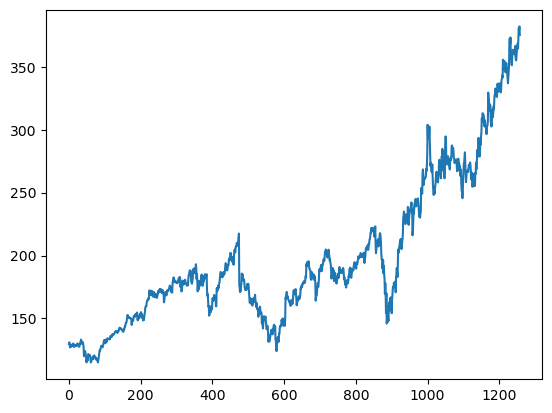

In [58]:
# it makes more sense to plot one column at a time
df['Adj Close'].plot() # plots using the num index (1,2,3,...) as the x-axis

<AxesSubplot:>

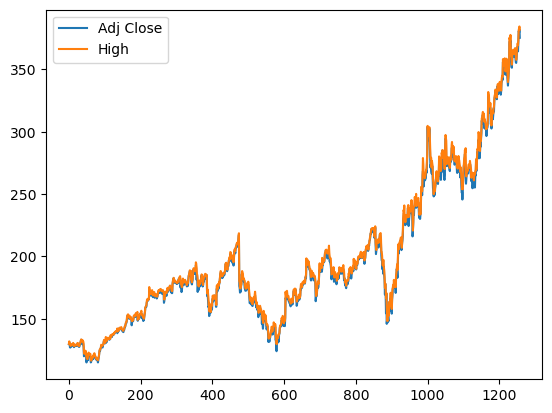

In [60]:
# to plot 2 or more cols, we need to pass in a LIST of cols
df[['Adj Close','High']].plot() #passing a list of cols to be plotted


<AxesSubplot:>

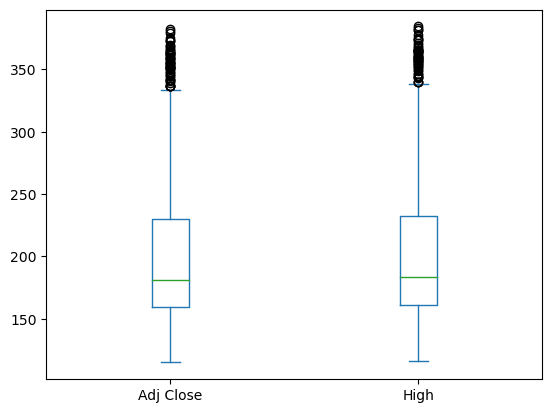

In [66]:
df[['Adj Close','High']].plot(kind='box') # we can choose differnt types of plots by using the kind param

<AxesSubplot:>

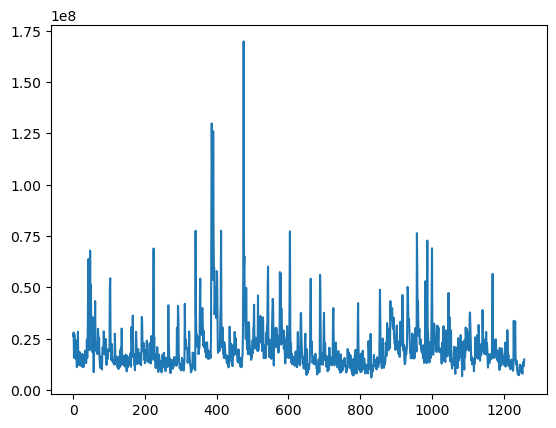

In [67]:
df['Volume'].plot()

<AxesSubplot:ylabel='Frequency'>

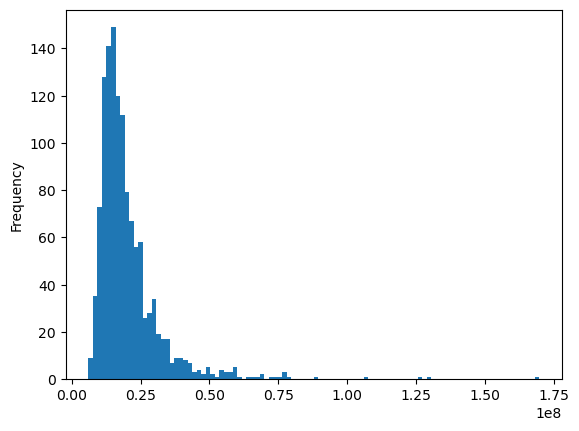

In [71]:
df['Volume'].plot(kind='hist',bins=100)
# histogram is for seeing frequency counts or distributions for any data

<AxesSubplot:ylabel='Density'>

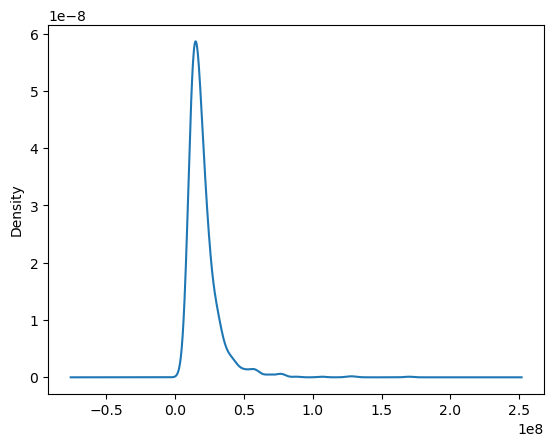

In [72]:
df['Volume'].plot(kind='kde')
# calculates a probability function for the data

<AxesSubplot:>

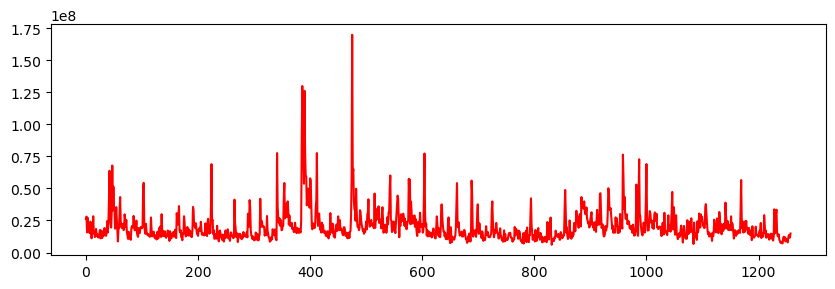

In [74]:
df['Volume'].plot(kind='line',c='red',figsize=(10,3))
# we can pass in some matplotlib params and funcs into the .plot() method of pandas

In [75]:
import matplotlib.pyplot as plt

<AxesSubplot:>

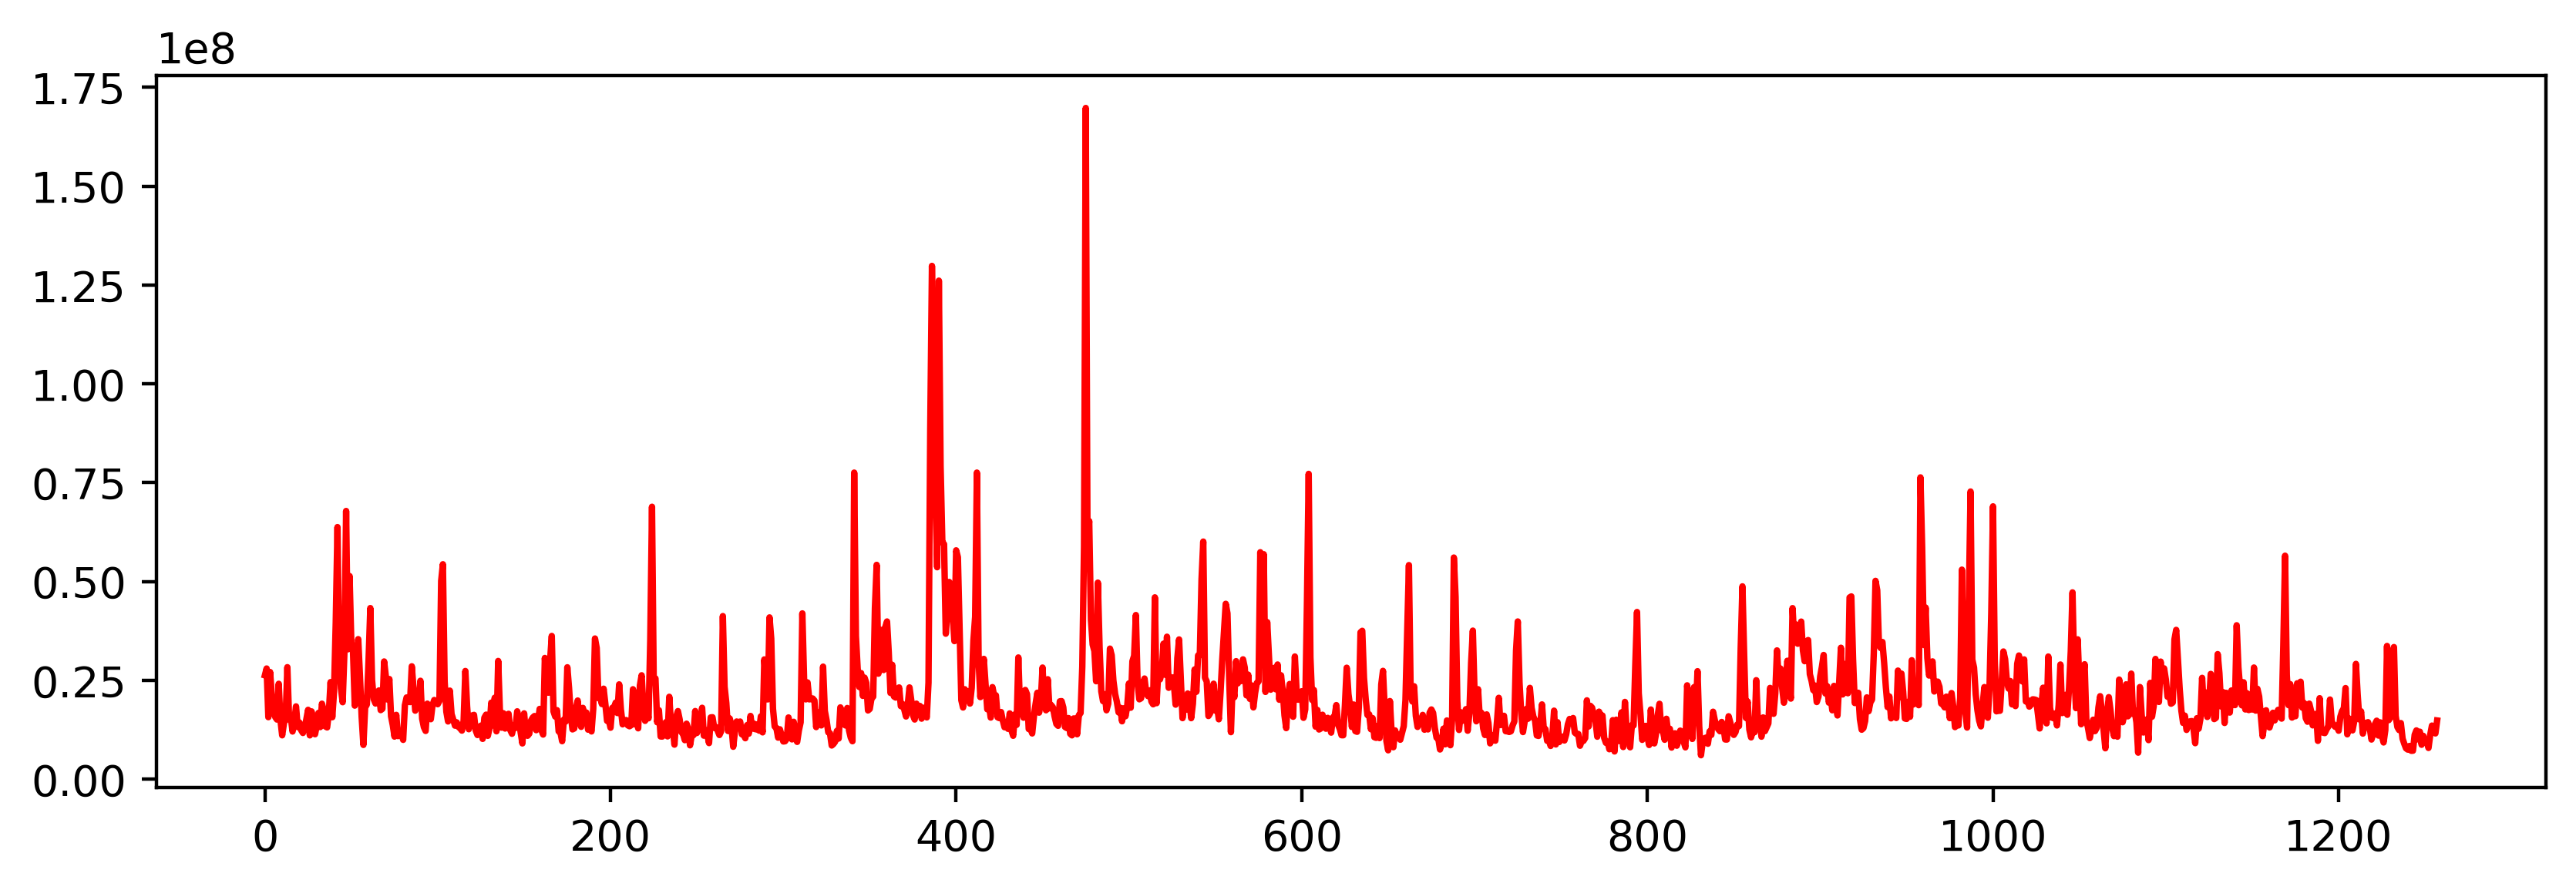

In [77]:
# we can call plt.figure() in the same line as a our pandas plot to use
# the full matplotlib features
plt.figure(figsize=(10,3),dpi=400)
df['Volume'].plot(kind='line',c='red')

In [78]:
new_df = pd.read_csv('DATA/TGT.csv')

In [79]:
new_df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-09-06,70.879997,70.959999,69.570000,70.099998,60.674061,8235200
1,2016-09-07,69.940002,70.419998,69.809998,70.300003,60.847187,5131500
2,2016-09-08,70.300003,70.300003,69.419998,69.459999,60.120117,9141200
3,2016-09-09,69.040001,69.419998,68.750000,69.000000,59.721989,6177800
4,2016-09-12,68.449997,69.519997,68.209999,69.300003,59.981625,8167900
...,...,...,...,...,...,...,...
1253,2021-08-27,248.149994,250.470001,247.679993,249.179993,249.179993,2660500
1254,2021-08-30,249.210007,251.380005,249.149994,249.360001,249.360001,2092700
1255,2021-08-31,249.149994,249.600006,245.419998,246.979996,246.979996,3966000
1256,2021-09-01,247.000000,247.550003,244.259995,246.369995,246.369995,2862700


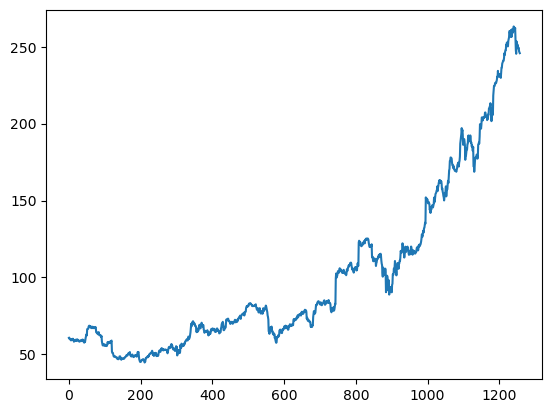

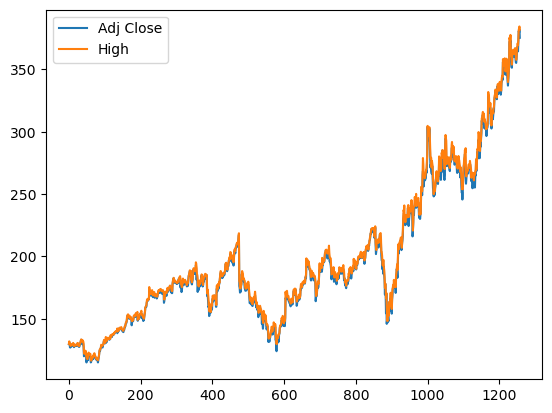

In [84]:
# in jupyter notebook, simple plots in the same cell, most of time will be plotted on the same graph
new_df['Adj Close'].plot(label='TGT')
df[['Adj Close','High']].plot(label='FB')
plt.legend()

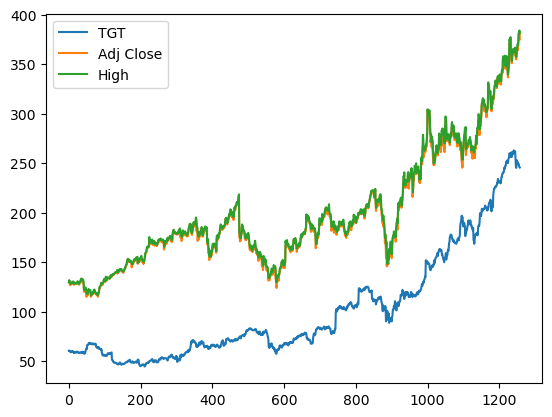

In [85]:
# how we plot multiple things on the same figure
ax = new_df['Adj Close'].plot(label='TGT')
df[['Adj Close','High']].plot(ax=ax)
plt.legend()

- Recommended way to connect multiple plots when they normally wouldn't connect together is using matplotlib's .subplot() method

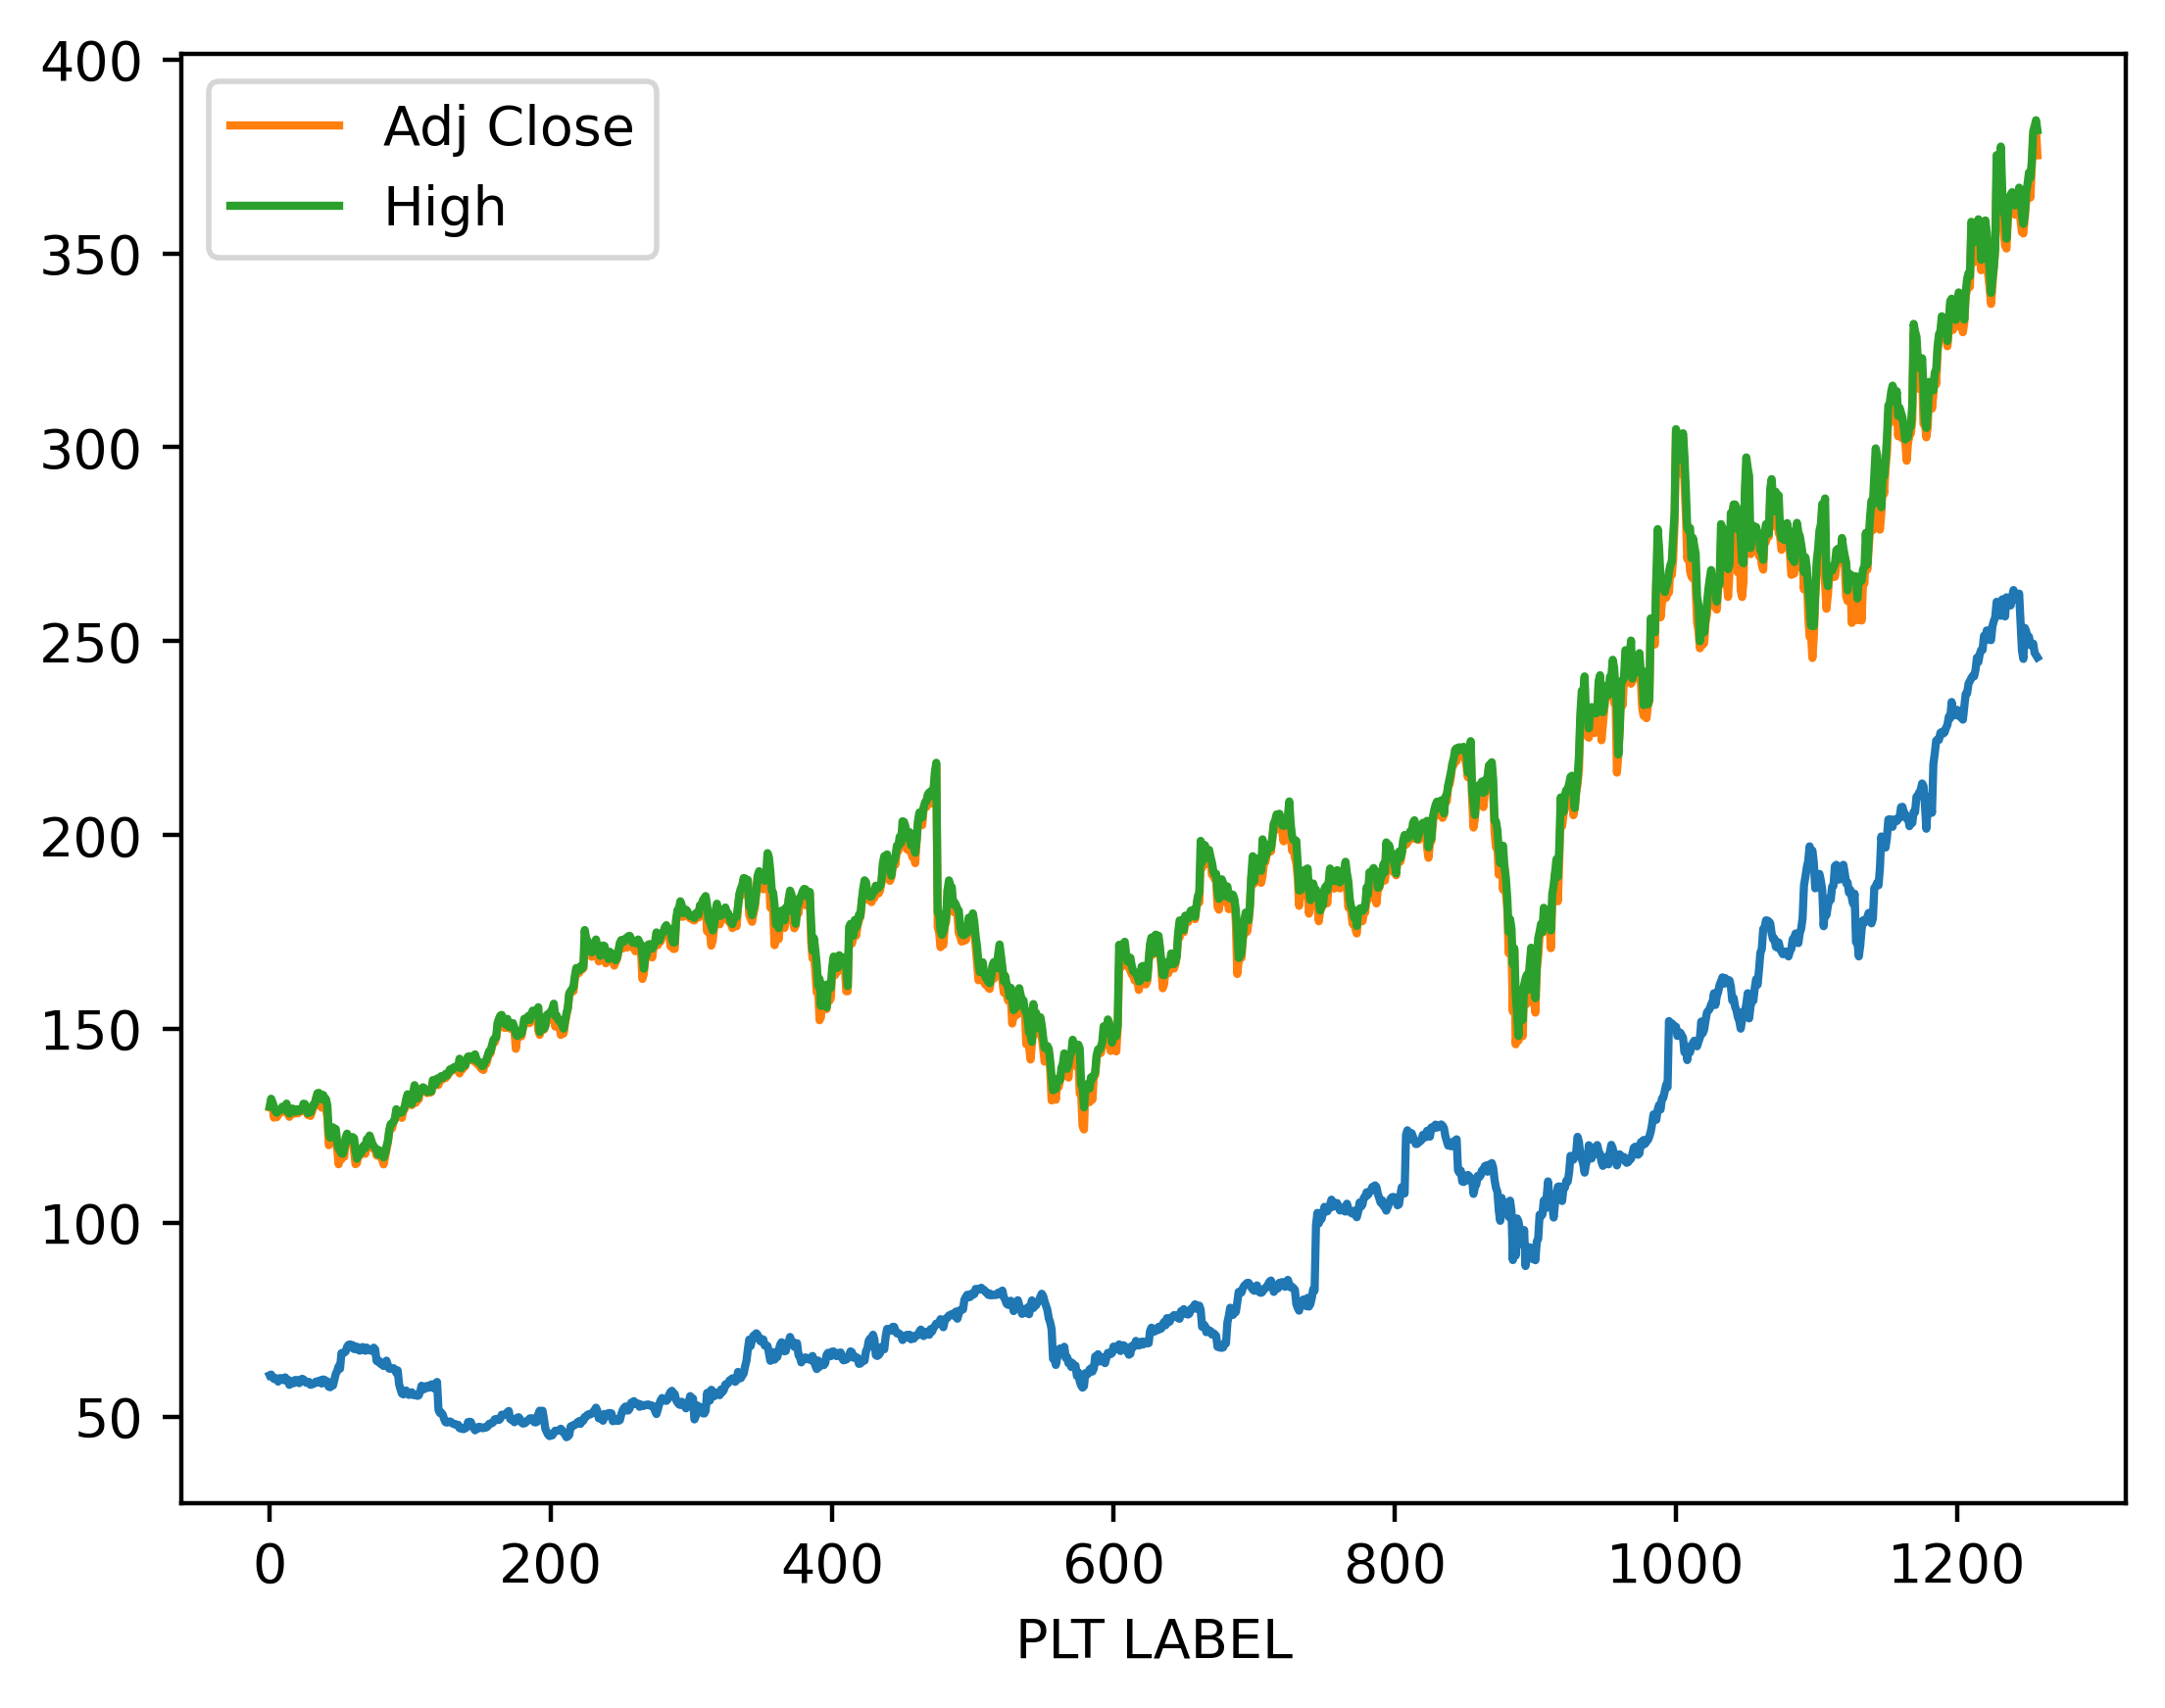

In [88]:
# the RECOMMENDED WAY:
fig,axes = plt.subplots(dpi=400) # we can also use any of the params in the subplots
# that we couldn't normally do in pandas, such as dpi

new_df['Adj Close'].plot(label='TGT', ax=axes)
df[['Adj Close','High']].plot(ax=axes)

plt.xlabel('PLT LABEL')

plt.savefig('my_new_plot.png')

## Pandas: Visualizing Time Series

In [94]:
df = pd.read_csv('DATA/COST.csv',index_col='Date',parse_dates=True)

In [95]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-09-06,158.130005,158.149994,156.020004,158.059998,140.896622,2716900
2016-09-07,157.639999,157.869995,155.399994,155.639999,138.739395,2984100
2016-09-08,155.190002,155.490005,152.940002,153.470001,136.805038,2993100
2016-09-09,152.589996,152.789993,150.699997,150.699997,134.335831,2993900
2016-09-12,150.500000,151.990005,150.259995,151.690002,135.218338,2982400
...,...,...,...,...,...,...
2021-08-27,449.309998,451.619995,446.799988,450.339996,450.339996,1310200
2021-08-30,451.040009,456.589996,450.440002,455.929993,455.929993,1219800
2021-08-31,456.140015,456.880005,452.440002,455.489990,455.489990,1699000


In [96]:
df.index

DatetimeIndex(['2016-09-06', '2016-09-07', '2016-09-08', '2016-09-09',
               '2016-09-12', '2016-09-13', '2016-09-14', '2016-09-15',
               '2016-09-16', '2016-09-19',
               ...
               '2021-08-20', '2021-08-23', '2021-08-24', '2021-08-25',
               '2021-08-26', '2021-08-27', '2021-08-30', '2021-08-31',
               '2021-09-01', '2021-09-02'],
              dtype='datetime64[ns]', name='Date', length=1258, freq=None)

<AxesSubplot:xlabel='Date'>

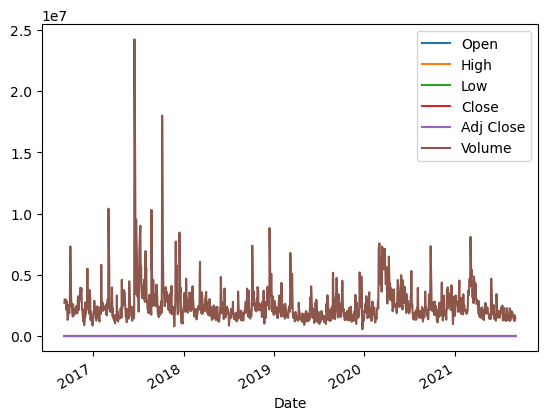

In [97]:
df.plot()

<AxesSubplot:xlabel='Date'>

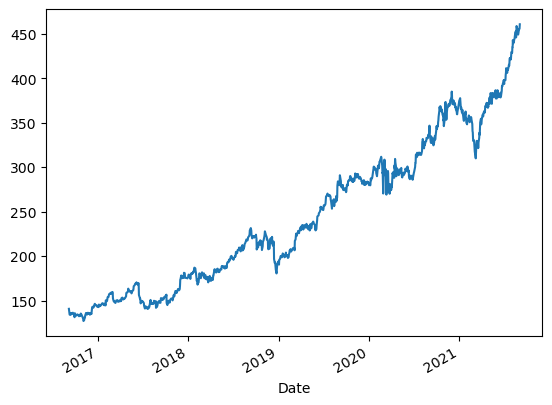

In [98]:
df['Adj Close'].plot() #grabbing the whole Adj Close col

<AxesSubplot:xlabel='Date'>

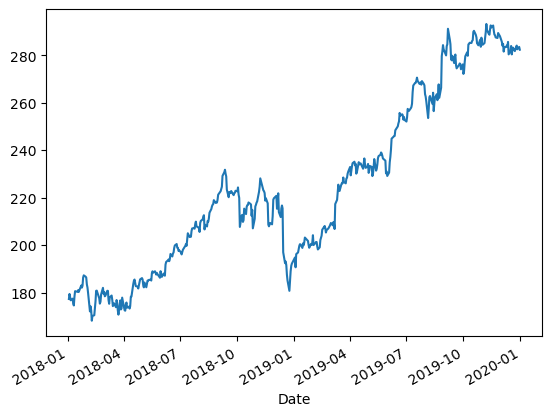

In [105]:
df['Adj Close']['2018-01-01':'2020-1-1'].plot() #grabbing a slice of the Adj Close col
# the ylimit is automatically adjusted for the slice of data that you're grabbing

<AxesSubplot:xlabel='Date'>

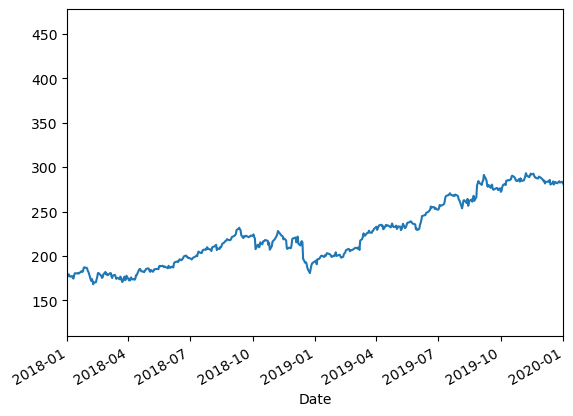

In [104]:
df['Adj Close'].plot(xlim=['2018-1-1','2020-1-1']) #another way of getting the slice
# the plot here looks different because the y-axis are different
# it first chooses the ylimits based on the whole data and then does the xlim

In [108]:
from matplotlib import dates

<AxesSubplot:xlabel='Date'>

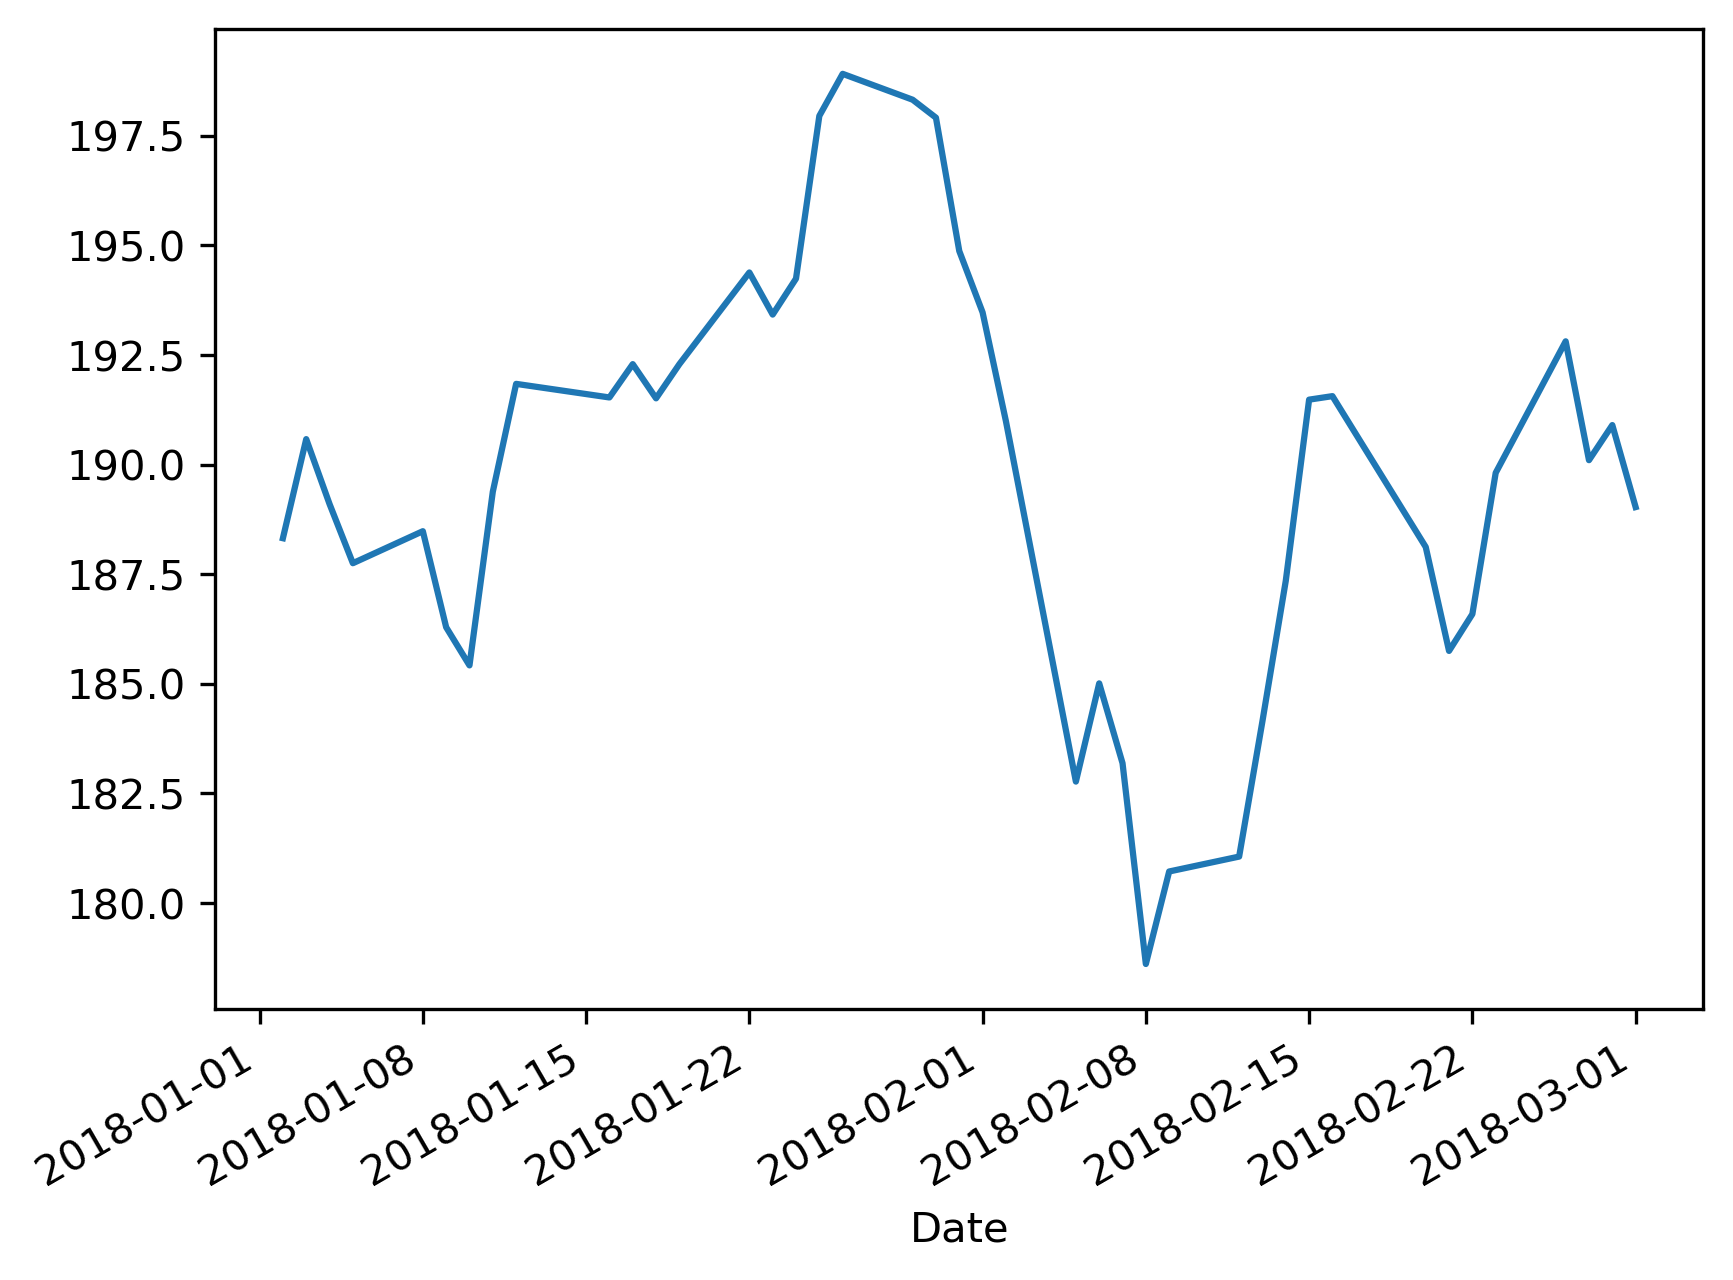

In [107]:
plt.figure(dpi=300)
df['Close']['2018-1-1':'2018-3-1'].plot()

In [109]:
# notice how the x ticks go from 01-22 to 02-01, whereas before it jumped every 1 week
# we can fix this by using the formatter and locater
# LOCATORS set the axis location of ticks to a particular date position
# FORMATTERS: allows you to format the timestap to your particular string choosing

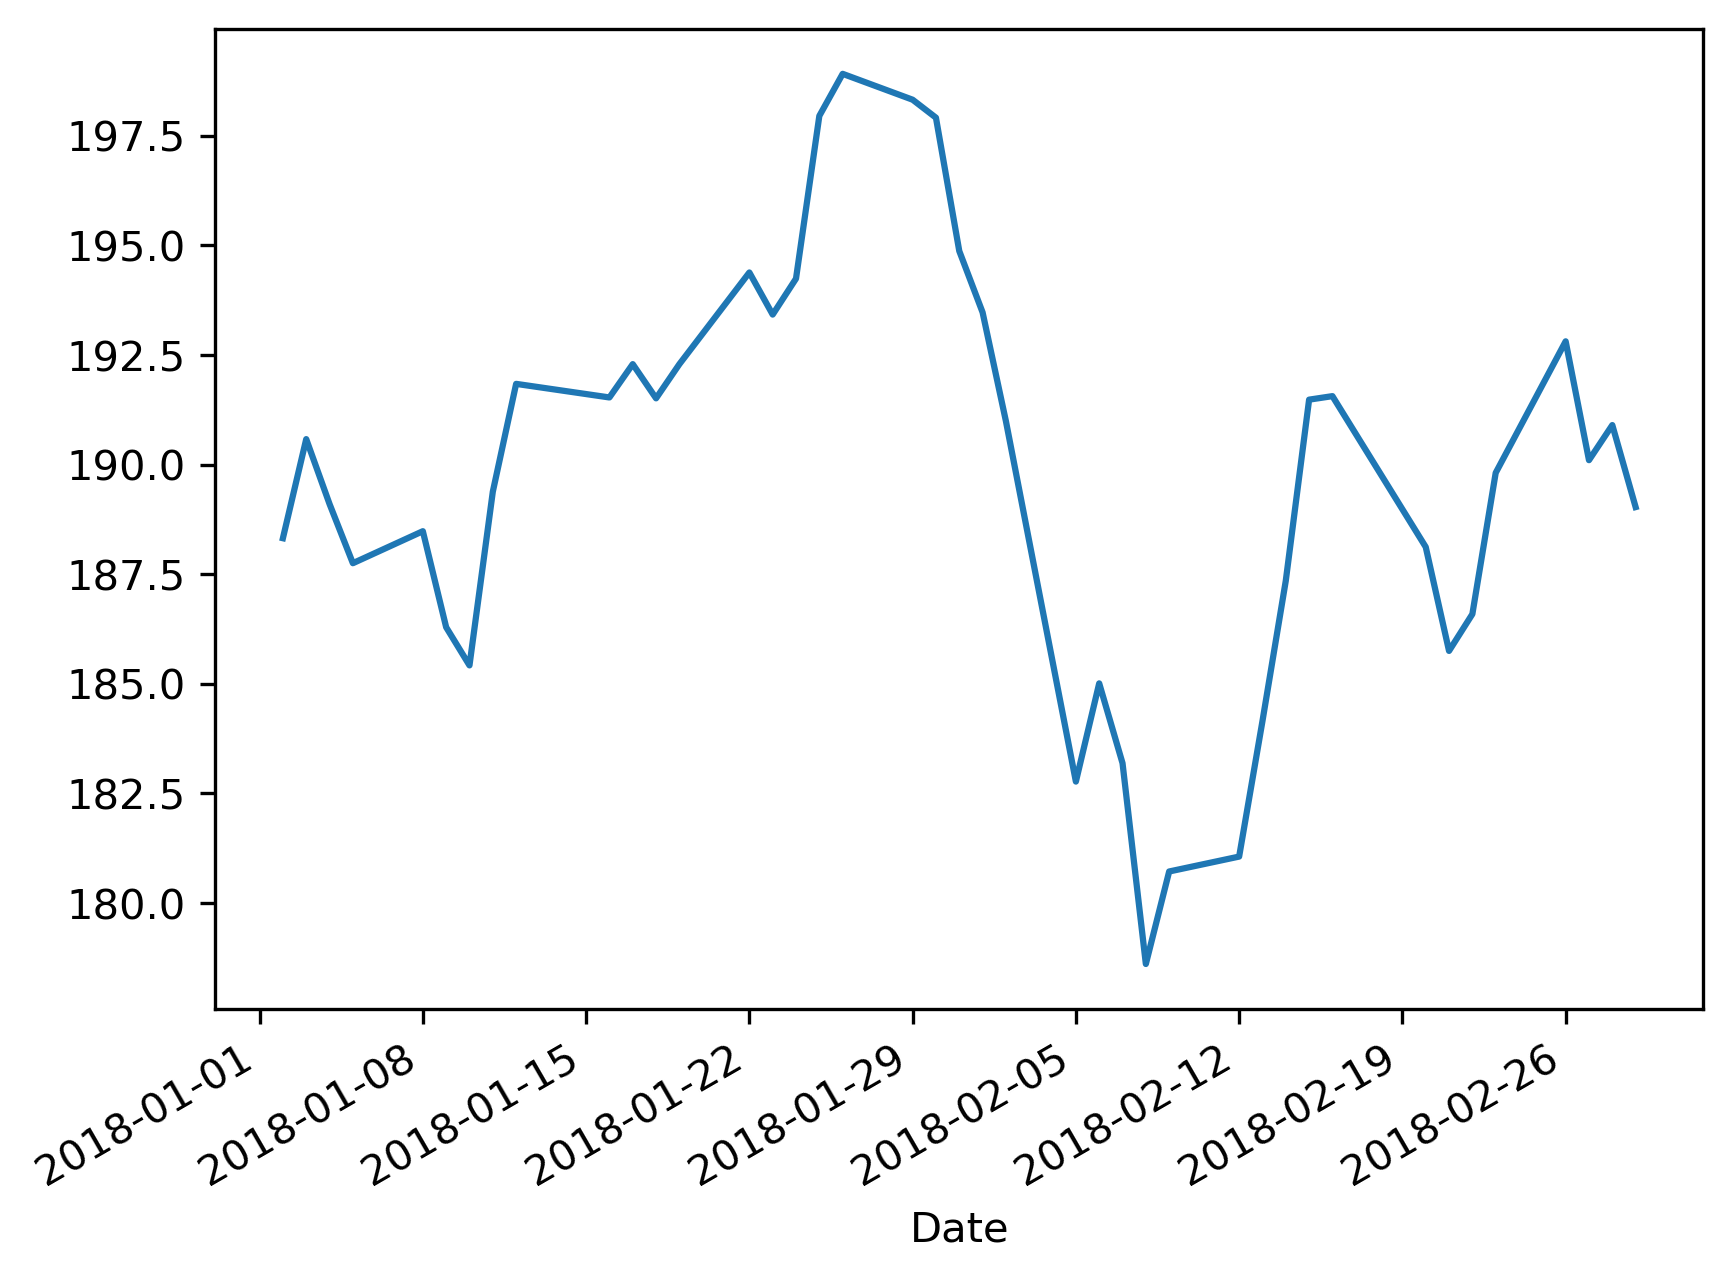

In [112]:
plt.figure(dpi=300)
axis = df['Close']['2018-1-1':'2018-3-1'].plot()

axis.xaxis.set_major_locator(dates.WeekdayLocator(byweekday=0))
# we can see that the x axis ticks have been moved
# the default for the byweekday param of .WeekdayLocator() method is 1
# which means that all the ticks are happening on a Tuesday
# after changing the param byweekday=0, now it's located on all the Mondays

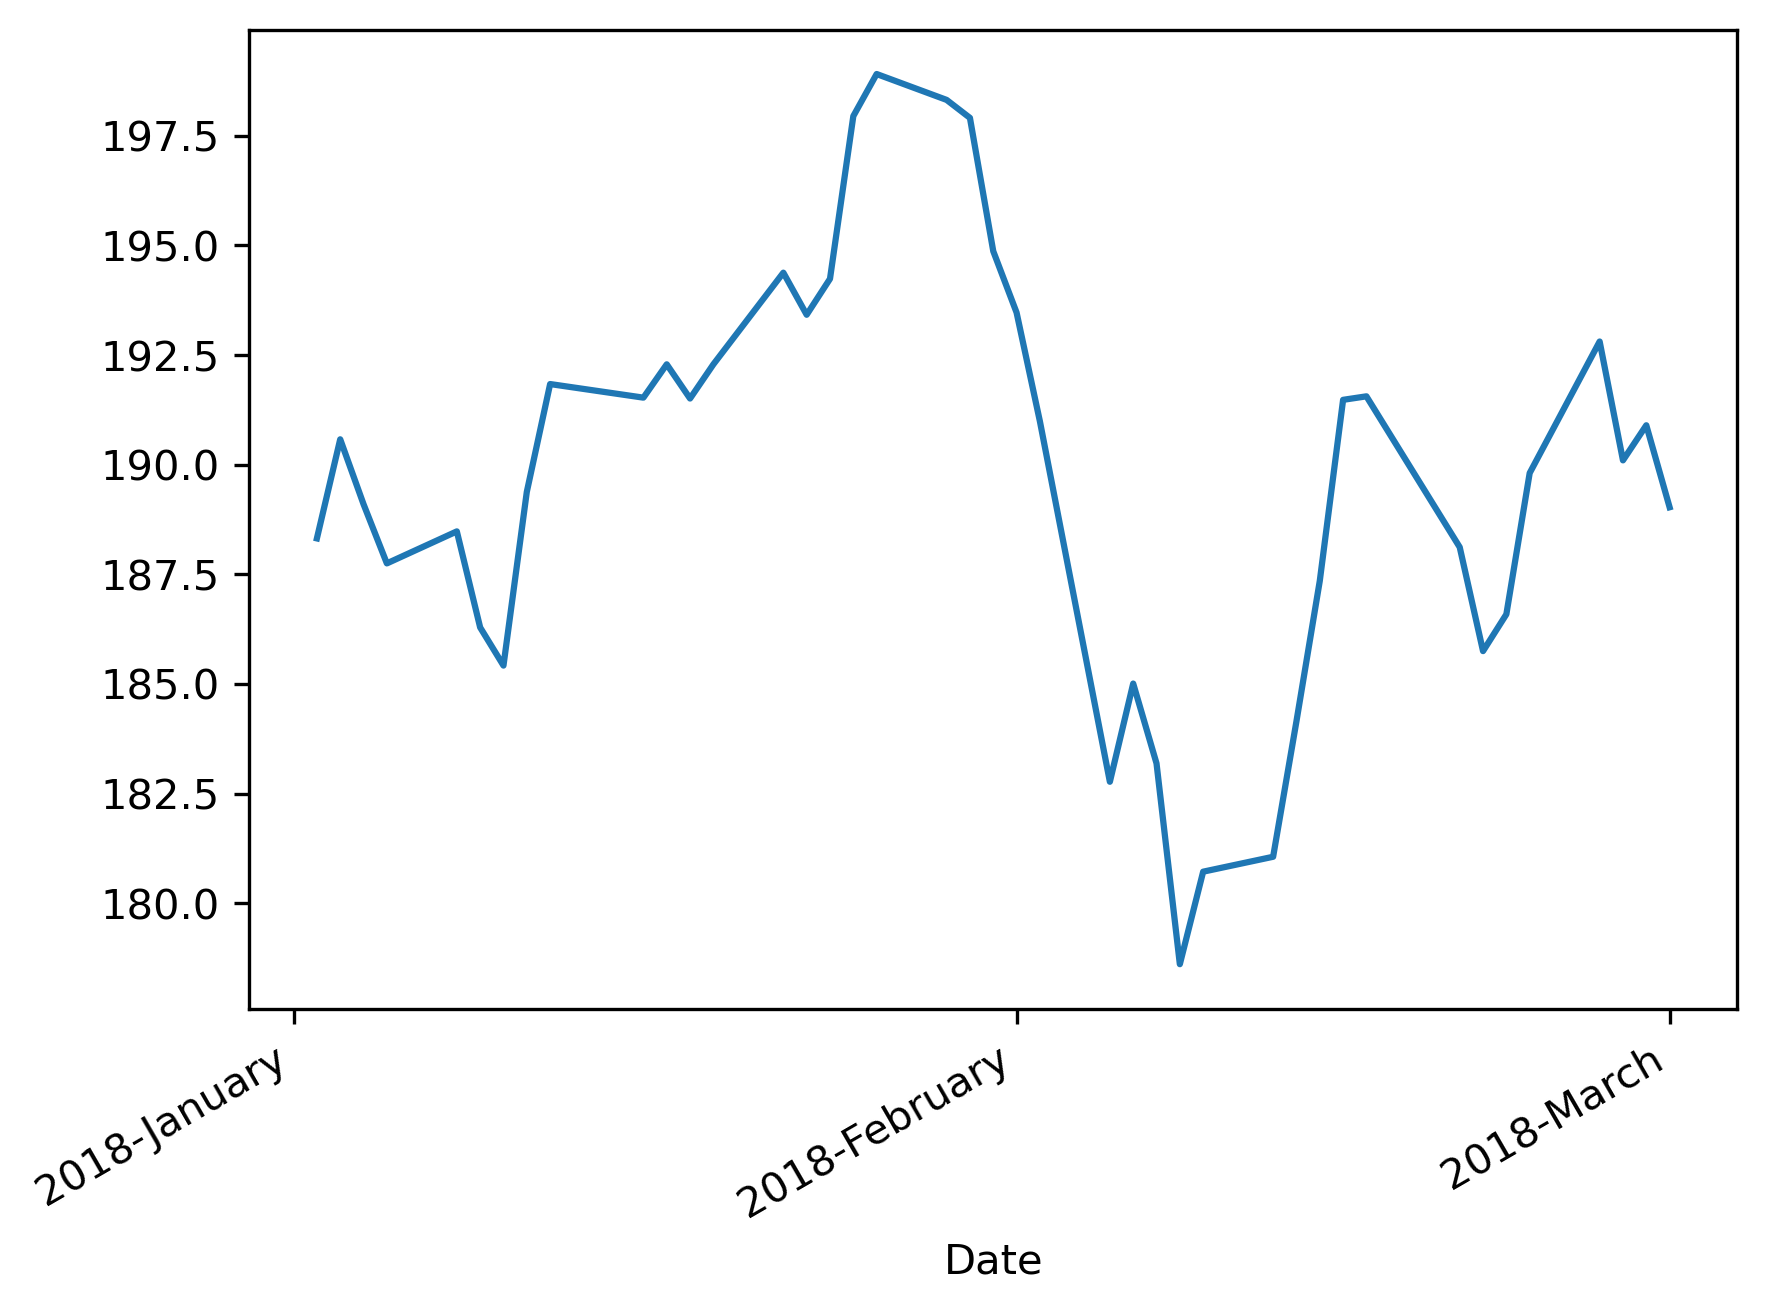

In [113]:
# we can format the actual timestamp to a string of our choice
# WE HAVE A TABLE IN THE COURSE NOTEBOOK FOR FORMATTING
plt.figure(dpi=300)
axis = df['Close']['2018-1-1':'2018-3-1'].plot()

axis.xaxis.set_major_locator(dates.MonthLocator())
# we grab the same axis for the formatter
axis.xaxis.set_major_formatter(dates.DateFormatter('%Y-%B'))

### Part2: Visualizing Time Series with Panda

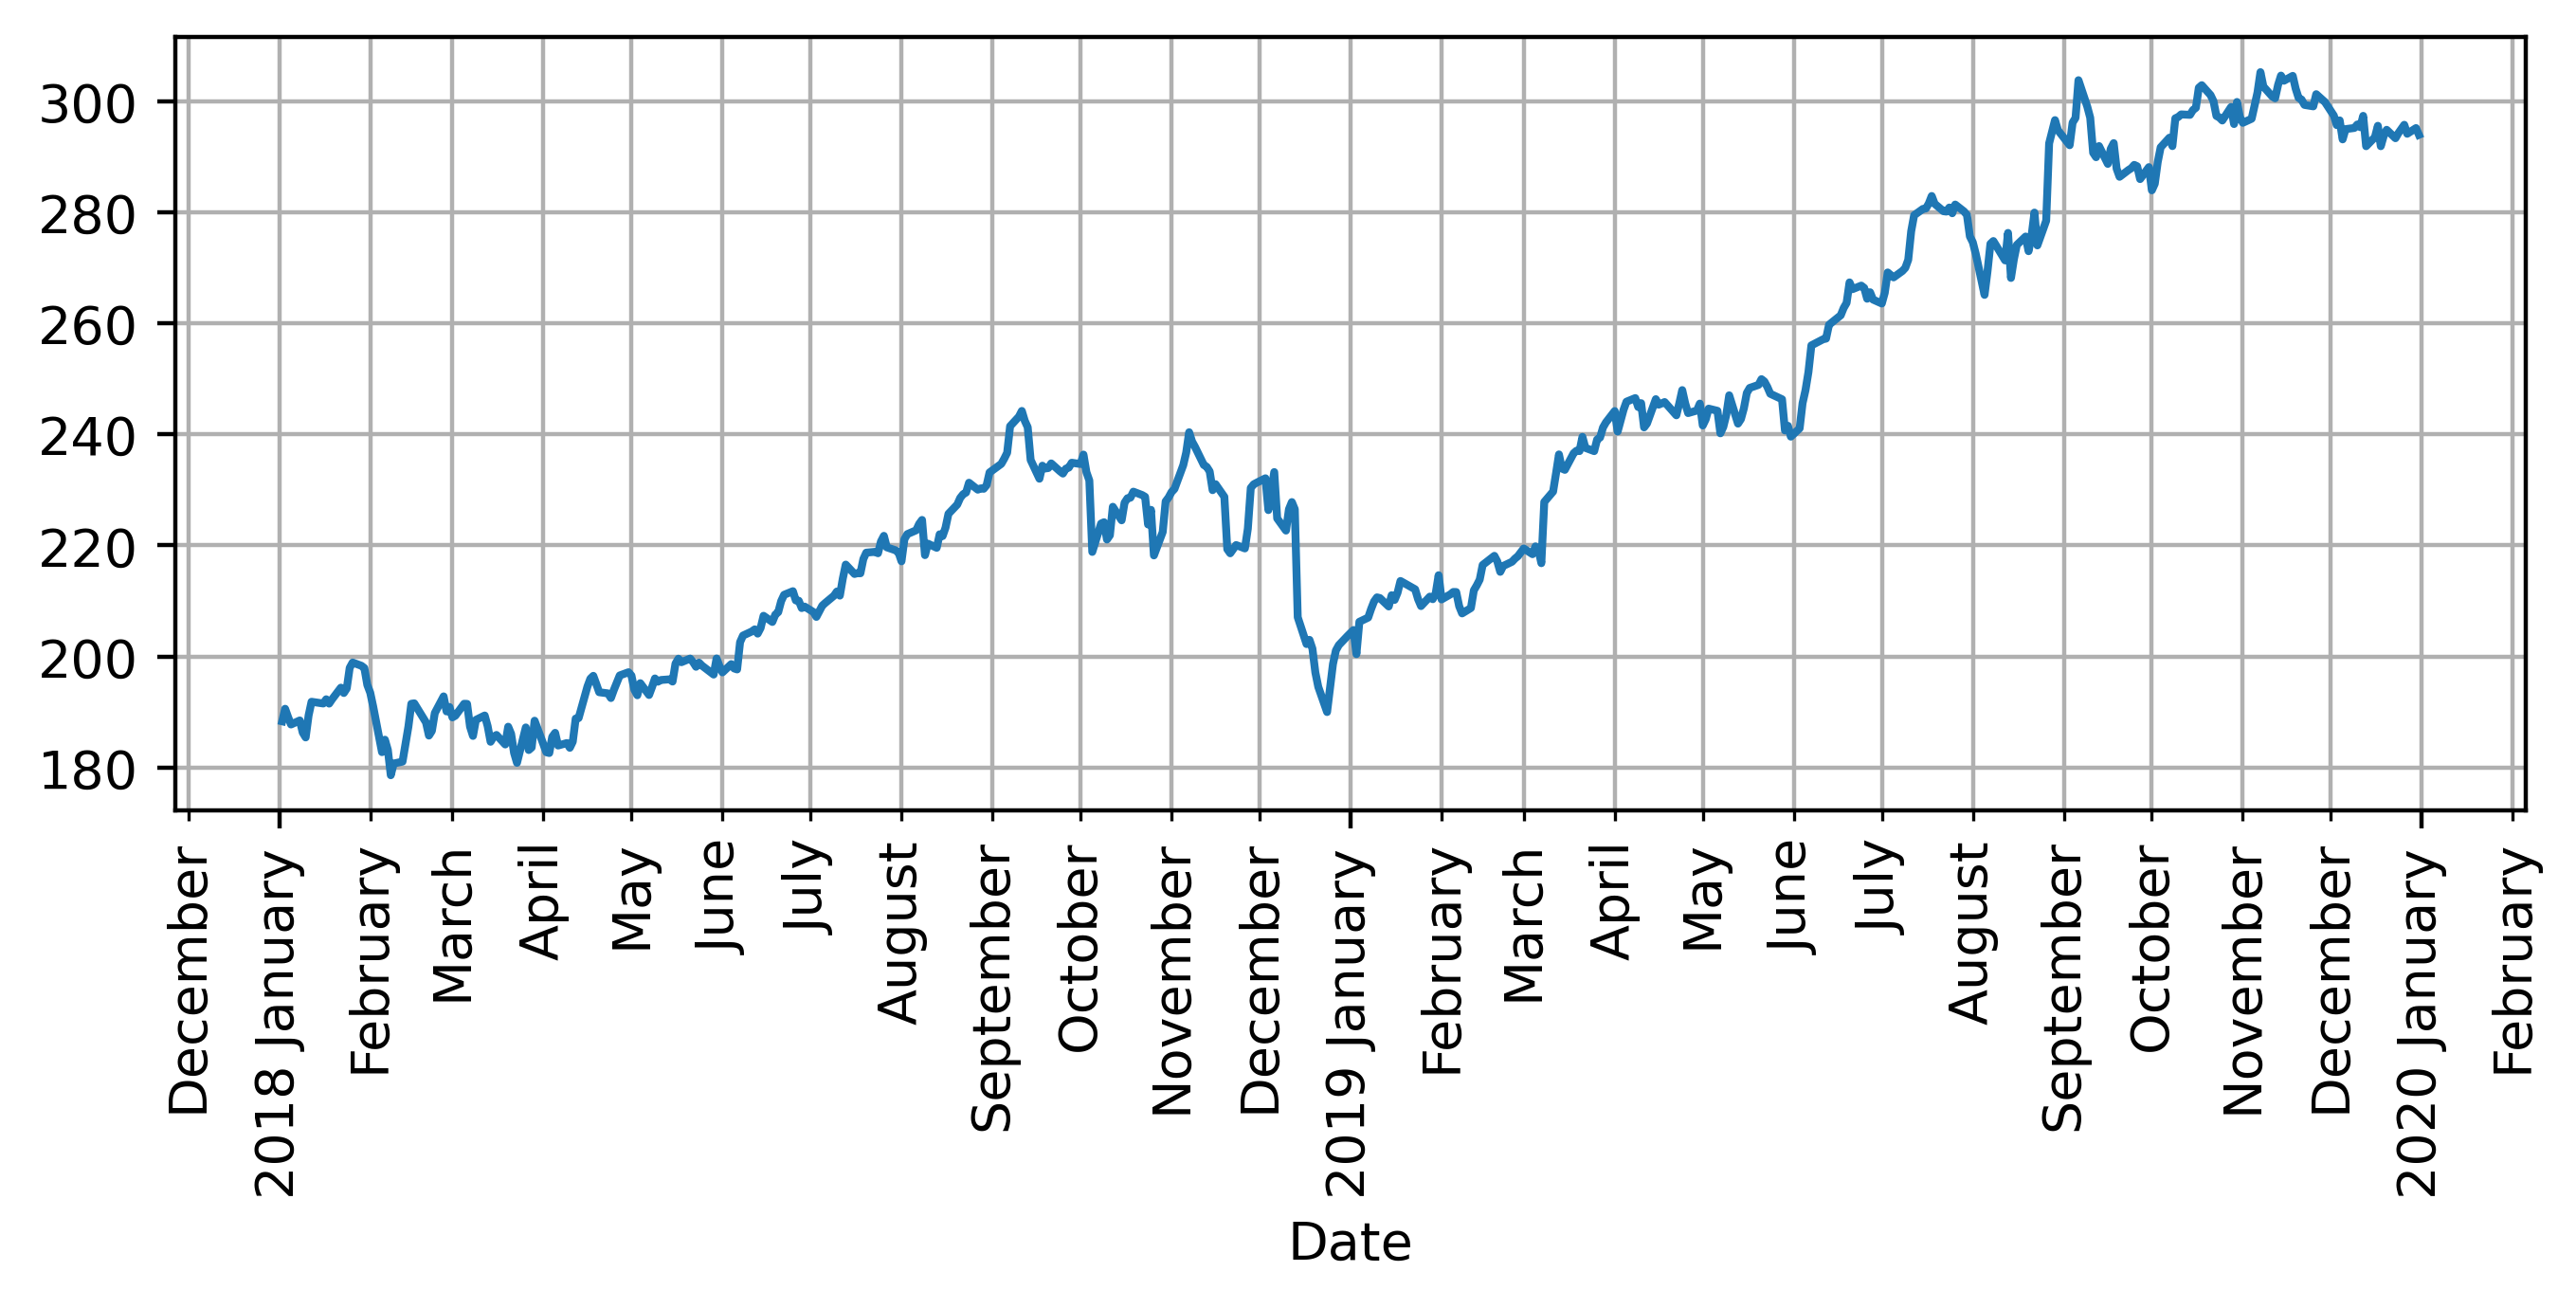

In [128]:
plt.figure(figsize=(8,3),dpi=400)
ax = df['Close']['2018-1-1':'2020-1-1'].plot()
ax.xaxis.set_major_locator(dates.YearLocator())
ax.xaxis.set_major_formatter(dates.DateFormatter('%Y %B'))

ax.xaxis.set_minor_locator(dates.MonthLocator())
ax.xaxis.set_minor_formatter(dates.DateFormatter('%B'))

ax.tick_params(axis='x',which='minor',rotation=90)
ax.tick_params(axis='x',which='major',rotation=90)

plt.xticks(ha='center');

ax.xaxis.grid(True,which='both')
ax.yaxis.grid(True,which='both')

## Rolling Statistics

- allows us to get information over a "window" of time
    - e.g. the mean price value over a 7 day period
- the window moves along with the dataset, allowing us to see a moving or "rolling" statistic

In [136]:
df = pd.read_csv('DATA/WMT.csv',index_col="Date",parse_dates=True)
# it is RECOMMENDED to always set the index_col and parse_dates params for
# financial datasets

<AxesSubplot:xlabel='Date'>

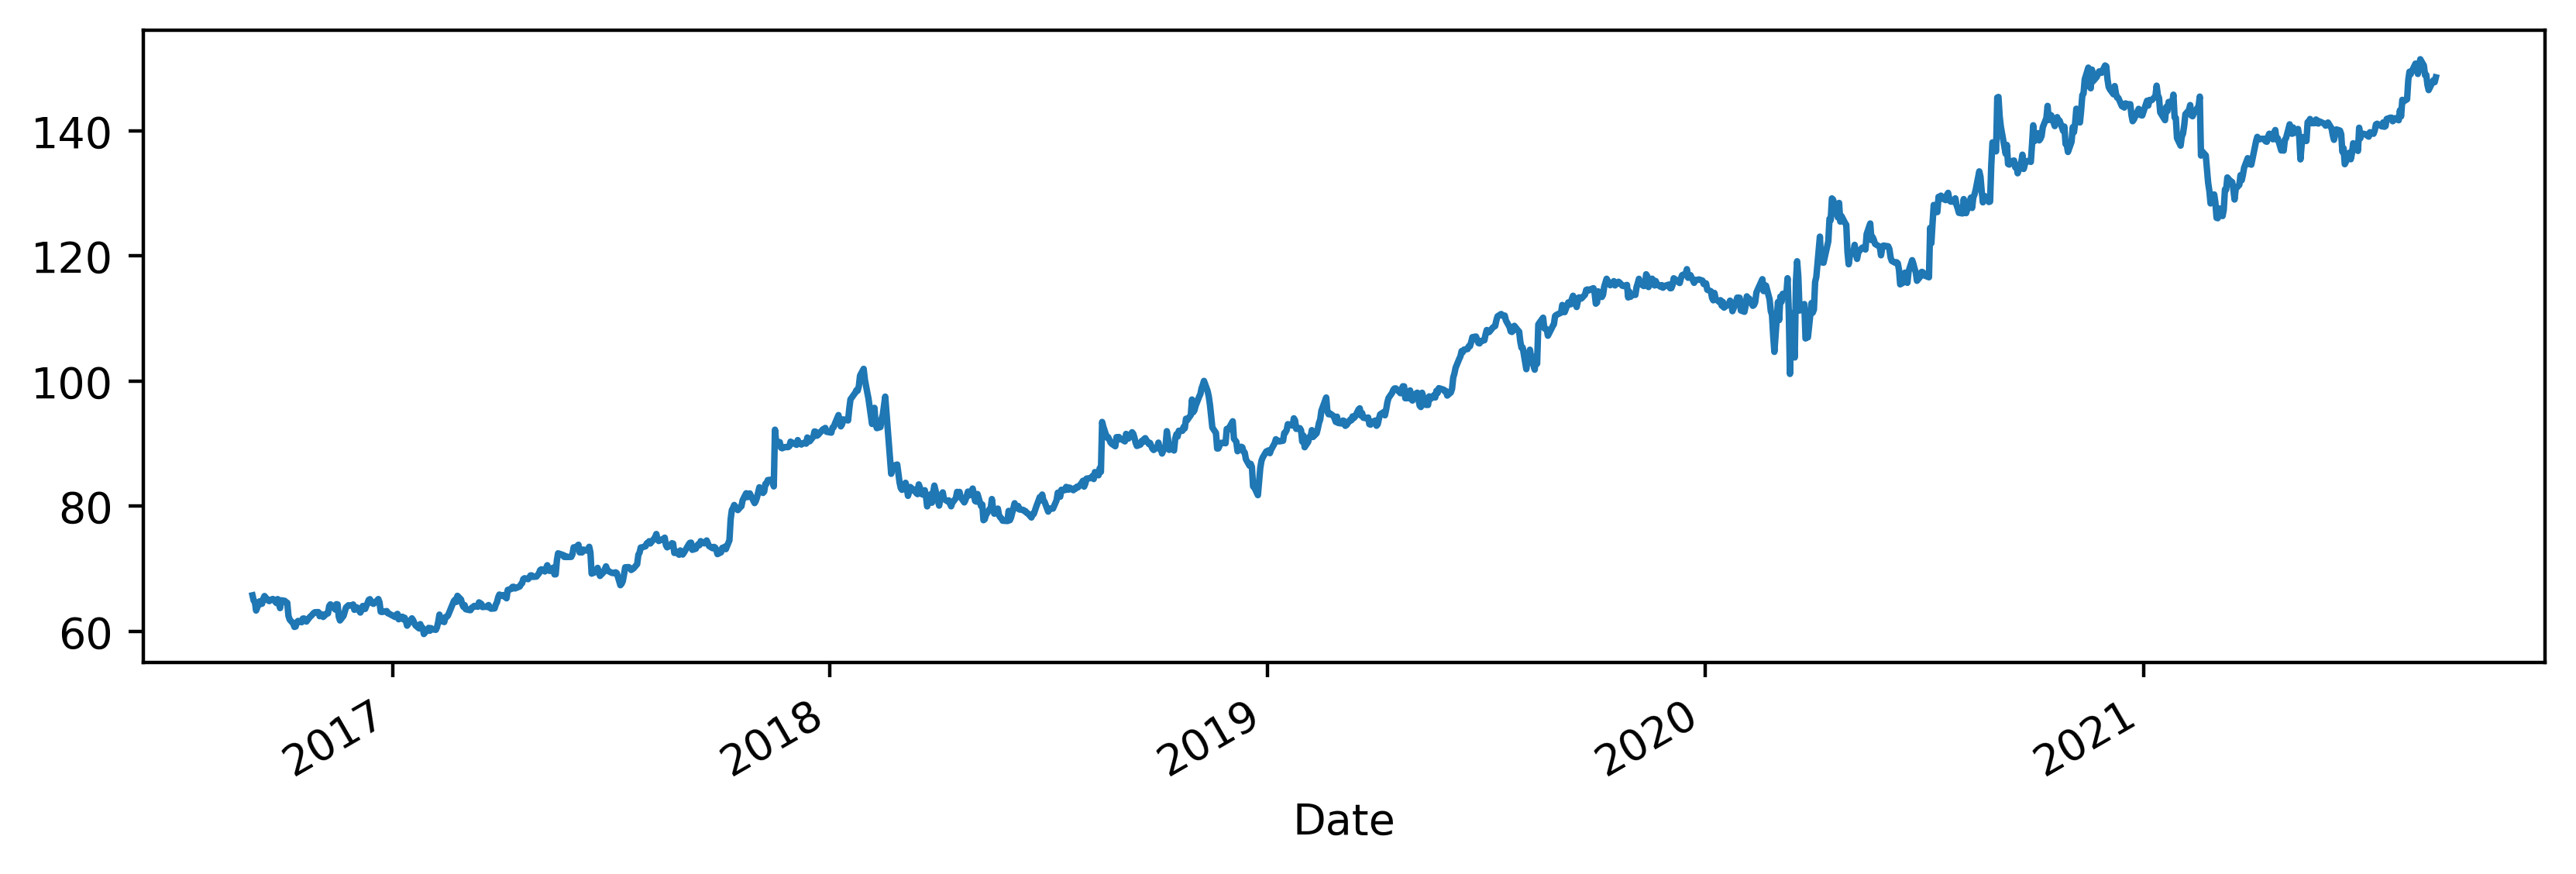

In [137]:
plt.figure(figsize=(10,3),dpi=400)
df['Adj Close'].plot()

In [138]:
df['Adj Close'].rolling(window=3).mean()
# the window is in the units of our xaxis
# for us, it's in days
# the first 2 days are NaN because we don't have enough data yet for 3 day moving window

Date
2016-09-06           NaN
2016-09-07           NaN
2016-09-08     65.124522
2016-09-09     64.313810
2016-09-12     64.277781
                 ...    
2021-08-27    147.610006
2021-08-30    147.190002
2021-08-31    147.440002
2021-09-01    147.860001
2021-09-02    148.146668
Name: Adj Close, Length: 1258, dtype: float64

In [139]:
df['Adj Close'].head()

Date
2016-09-06    65.758080
2016-09-07    64.911324
2016-09-08    64.704163
2016-09-09    63.325943
2016-09-12    64.803238
Name: Adj Close, dtype: float64

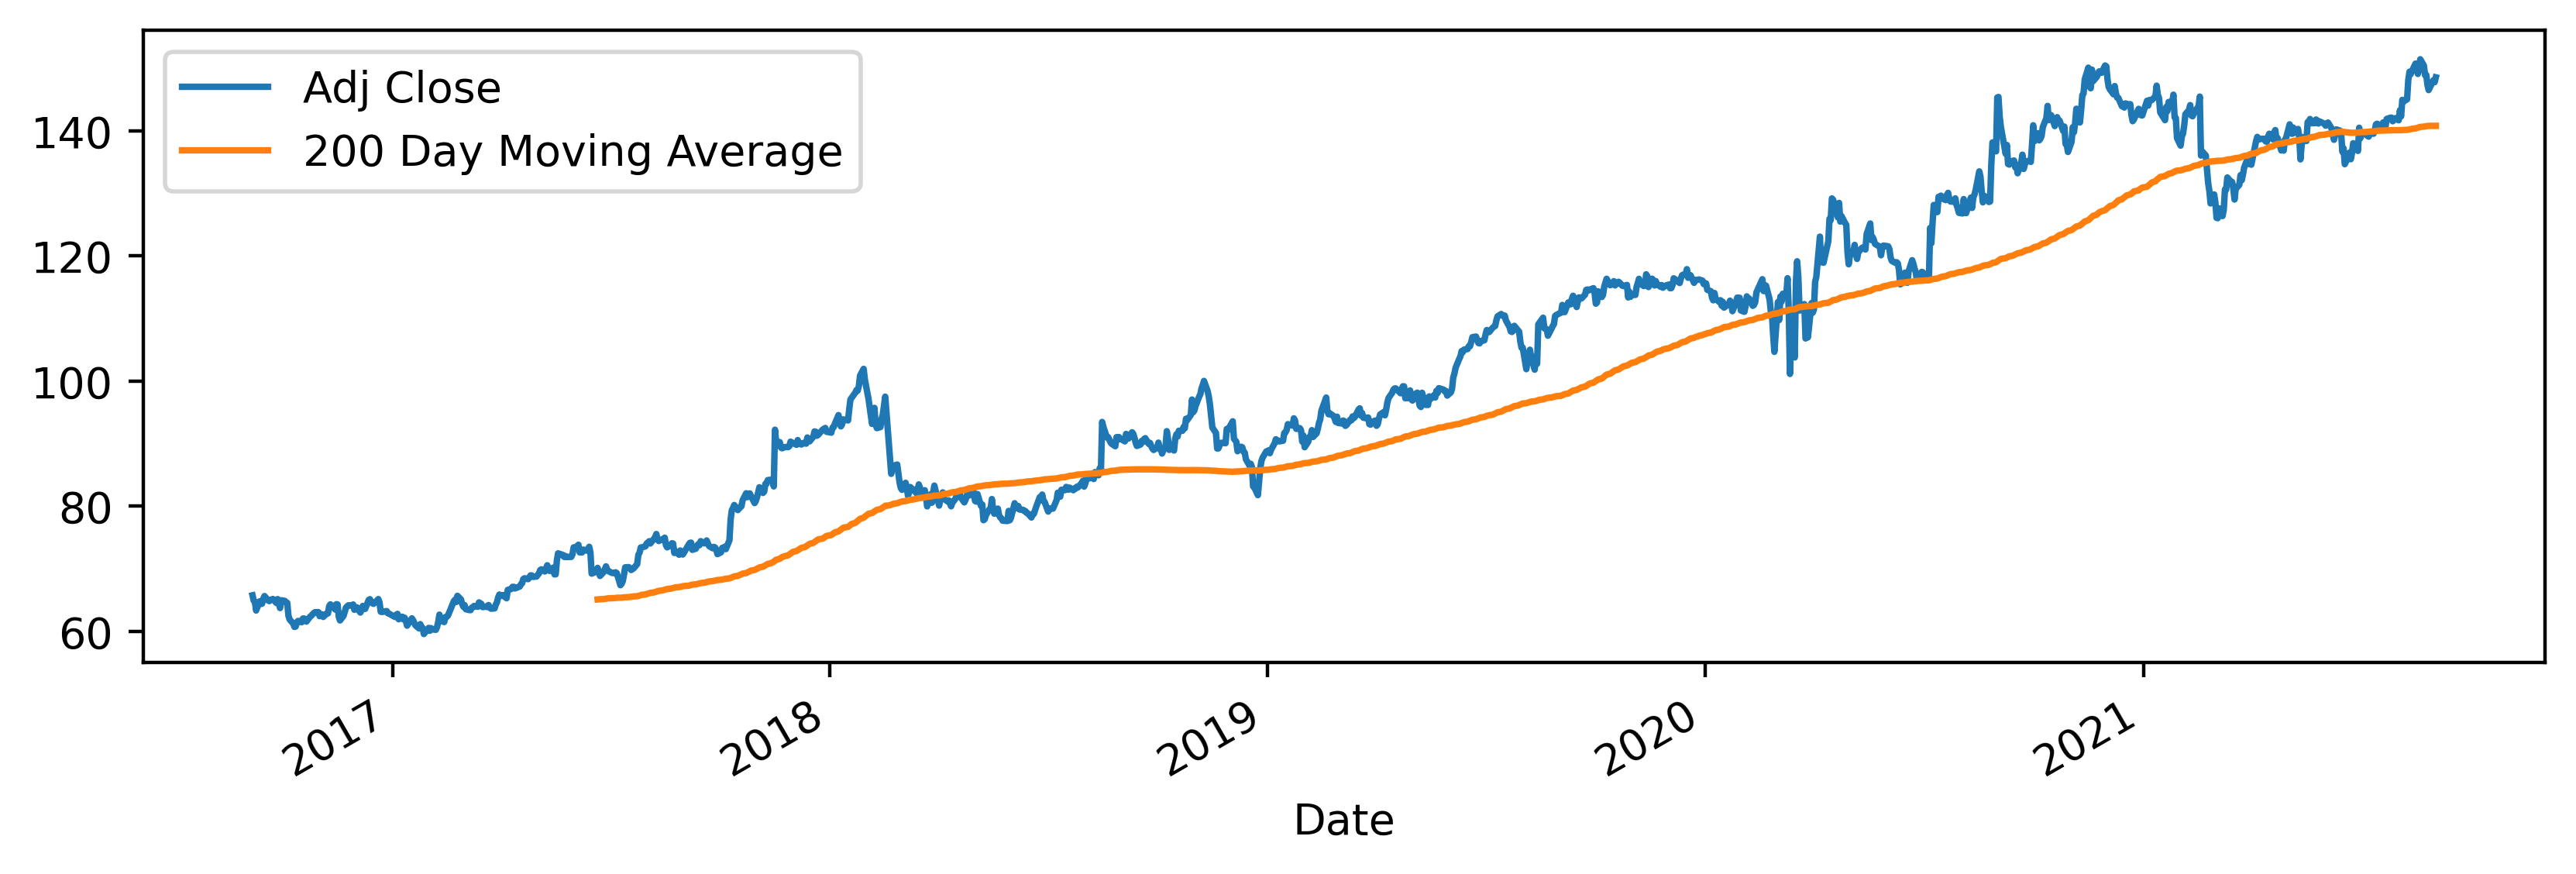

In [141]:
plt.figure(figsize=(10,3),dpi=400)
df['Adj Close'].plot(label='Adj Close')
df['Adj Close'].rolling(window=200).mean().plot(label='200 Day Moving Average')
plt.legend()

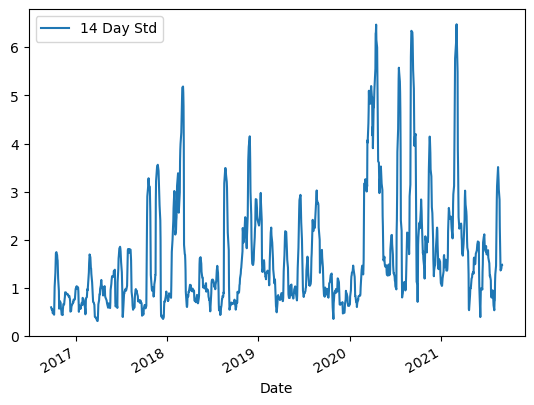

In [144]:
df['Adj Close'].rolling(window=14).std().plot(label='14 Day Std')
plt.legend()

## Pandas: Time Shifting and Row Calculations

- we'll be covering operations that are row dependent
    - e.g. moving a row
    - calcuating something based on the previous row

In [145]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-09-06,72.760002,73.080002,72.199997,73.000000,65.758080,9570900
2016-09-07,73.000000,73.050003,72.010002,72.059998,64.911324,9618300
2016-09-08,71.889999,72.320000,71.709999,71.830002,64.704163,9661200
2016-09-09,71.320000,71.510002,70.300003,70.300003,63.325943,12172600
2016-09-12,70.790001,72.239998,70.720001,71.940002,64.803238,10864000


In [147]:
df.shift(1).head() # we lost the last row of data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-09-06,NaN,NaN,NaN,NaN,NaN,NaN
2016-09-07,72.760002,73.080002,72.199997,73.000000,65.758080,9570900.0
2016-09-08,73.000000,73.050003,72.010002,72.059998,64.911324,9618300.0
2016-09-09,71.889999,72.320000,71.709999,71.830002,64.704163,9661200.0
2016-09-12,71.320000,71.510002,70.300003,70.300003,63.325943,12172600.0


In [148]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-08-27,147.509995,147.690002,146.179993,146.520004,146.520004,7691300
2021-08-30,146.419998,148.000000,146.020004,147.699997,147.699997,5480200
2021-08-31,147.990005,148.440002,147.240005,148.100006,148.100006,8359500
2021-09-01,147.559998,147.929993,146.570007,147.779999,147.779999,6352200
2021-09-02,148.119995,148.789993,147.690002,148.559998,148.559998,6674100


In [150]:
df.shift(1).tail() #we don't have the last row anymore with open of 148.11
# as it had nowhere to go to

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-08-27,147.470001,148.270004,146.669998,147.350006,147.350006,7822300.0
2021-08-30,147.509995,147.690002,146.179993,146.520004,146.520004,7691300.0
2021-08-31,146.419998,148.000000,146.020004,147.699997,147.699997,5480200.0
2021-09-01,147.990005,148.440002,147.240005,148.100006,148.100006,8359500.0
2021-09-02,147.559998,147.929993,146.570007,147.779999,147.779999,6352200.0


In [151]:
df.shift(-1).tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-08-27,146.419998,148.000000,146.020004,147.699997,147.699997,5480200.0
2021-08-30,147.990005,148.440002,147.240005,148.100006,148.100006,8359500.0
2021-08-31,147.559998,147.929993,146.570007,147.779999,147.779999,6352200.0
2021-09-01,148.119995,148.789993,147.690002,148.559998,148.559998,6674100.0
2021-09-02,NaN,NaN,NaN,NaN,NaN,NaN


In [152]:
df.shift(-1).head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-09-06,73.000000,73.050003,72.010002,72.059998,64.911324,9618300.0
2016-09-07,71.889999,72.320000,71.709999,71.830002,64.704163,9661200.0
2016-09-08,71.320000,71.510002,70.300003,70.300003,63.325943,12172600.0
2016-09-09,70.790001,72.239998,70.720001,71.940002,64.803238,10864000.0
2016-09-12,71.839996,71.910004,71.150002,71.459999,64.370857,7507900.0


In [153]:
df.shift(periods=1,freq='M') #shifted each row to the end of the month

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-09-30,72.760002,73.080002,72.199997,73.000000,65.758080,9570900
2016-09-30,73.000000,73.050003,72.010002,72.059998,64.911324,9618300
2016-09-30,71.889999,72.320000,71.709999,71.830002,64.704163,9661200
2016-09-30,71.320000,71.510002,70.300003,70.300003,63.325943,12172600
2016-09-30,70.790001,72.239998,70.720001,71.940002,64.803238,10864000
...,...,...,...,...,...,...
2021-08-31,147.509995,147.690002,146.179993,146.520004,146.520004,7691300
2021-08-31,146.419998,148.000000,146.020004,147.699997,147.699997,5480200
2021-09-30,147.990005,148.440002,147.240005,148.100006,148.100006,8359500


In [154]:
df['Adj Close']

Date
2016-09-06     65.758080
2016-09-07     64.911324
2016-09-08     64.704163
2016-09-09     63.325943
2016-09-12     64.803238
                 ...    
2021-08-27    146.520004
2021-08-30    147.699997
2021-08-31    148.100006
2021-09-01    147.779999
2021-09-02    148.559998
Name: Adj Close, Length: 1258, dtype: float64

In [155]:
'''what if we wanted a new pandas series that calculated the difference
between the current day and the previous day.

IRL Question: What ist he price difference, from the previous day?'''
df['Adj Close'].diff(1)


Date
2016-09-06         NaN
2016-09-07   -0.846756
2016-09-08   -0.207161
2016-09-09   -1.378220
2016-09-12    1.477295
                ...   
2021-08-27   -0.830002
2021-08-30    1.179993
2021-08-31    0.400009
2021-09-01   -0.320007
2021-09-02    0.779999
Name: Adj Close, Length: 1258, dtype: float64

In [156]:
# what if we wanted the percentage change?
df['Adj Close'].pct_change(1)

Date
2016-09-06         NaN
2016-09-07   -0.012877
2016-09-08   -0.003191
2016-09-09   -0.021300
2016-09-12    0.023328
                ...   
2021-08-27   -0.005633
2021-08-30    0.008053
2021-08-31    0.002708
2021-09-01   -0.002161
2021-09-02    0.005278
Name: Adj Close, Length: 1258, dtype: float64

#### Cumulative Sums and Products

In [158]:
example_series = pd.Series([1,2,3,4])
example_series

0    1
1    2
2    3
3    4
dtype: int64

In [159]:
example_series.cumsum() #Cumulative Sum

0     1
1     3
2     6
3    10
dtype: int64

In [160]:
example_series.cumprod() #cumulative Product

0     1
1     2
2     6
3    24
dtype: int64

In [163]:
# we can use the .pct_change() method and the cumprod() method to effectively
# calculate our cumulative returns
df['Adj Close'].pct_change(1).cumsum()*100

Date
2016-09-06          NaN
2016-09-07    -1.287684
2016-09-08    -1.606828
2016-09-09    -3.736861
2016-09-12    -1.404018
                ...    
2021-08-27    91.937454
2021-08-30    92.742800
2021-08-31    93.013625
2021-09-01    92.797550
2021-09-02    93.325361
Name: Adj Close, Length: 1258, dtype: float64

## Data Sources pt.1: Programmatic API Sources

- there are many APIs and Python libraries that can directly connect to popular online data sources

In [7]:
import pandas_datareader.data as web
from datetime import datetime

In [10]:
start_date = datetime(2020,1,1)
end_date = datetime(2021,1,1)

aapl_df = web.DataReader('AAPL','yahoo')

TypeError: string indices must be integers

In [14]:
inflation_df = web.DataReader('T10YIE','fred',start='2004-1-1',end='2020-1-1')

In [15]:
inflation_df

,T10YIE
DATE,
2004-01-01,NaN
2004-01-02,2.32
2004-01-05,2.35
2004-01-06,2.32
2004-01-07,2.33
...,...
2019-12-26,1.74
2019-12-27,1.73
2019-12-30,1.75


In [16]:
import yfinance as yf

In [19]:
apple = yf.download('AAPL',start='2020-1-1',end='2021-1-1')

[*********************100%***********************]  1 of 1 completed


In [20]:
apple

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,74.059998,75.150002,73.797501,75.087502,73.449379,135480400
2020-01-03,74.287498,75.144997,74.125000,74.357498,72.735321,146322800
2020-01-06,73.447502,74.989998,73.187500,74.949997,73.314888,118387200
2020-01-07,74.959999,75.224998,74.370003,74.597504,72.970078,108872000
2020-01-08,74.290001,76.110001,74.290001,75.797501,74.143898,132079200
...,...,...,...,...,...,...
2020-12-24,131.320007,133.460007,131.100006,131.970001,130.205765,54930100
2020-12-28,133.990005,137.339996,133.509995,136.690002,134.862671,124486200
2020-12-29,138.050003,138.789993,134.339996,134.869995,133.067001,121047300


In [21]:
# we can grab a ticker object for more info
apple_ticker = yf.Ticker('APPL')

In [23]:
apple_ticker.get_balancesheet()

Exception: yfinance failed to decrypt Yahoo data response

In [30]:
apple_ticker.cash_flow

Exception: yfinance failed to decrypt Yahoo data response

In [29]:
a